### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [233]:
data = pd.read_csv('data/coupons.csv')

In [234]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [235]:
# Summarize the info about the data set
data.info()
# Get a statistics on the missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [236]:
# Are there any duplicated rows 
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [237]:
# Since lotsof missing values from car, remove the column car
mydata = data.drop("car",axis = 'columns')
mydata.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [238]:
# Let's use dropna with axis=0 to drop rows with one or more missing values
mydf=mydata.dropna(axis=0)
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [239]:
#Since 5 categorial columns (Bar, CoffeeHouse,CarryAway,RestaurantLessThan20, Restaurant20To50) have missing values, let's first replace them them with numerical values 
mydf['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [240]:
# Replacing the unique values of Bar [0, less than 1, 1 to 3, 4 to 8 or greater than 8 ] = [0,1,2,6,7]
mydf['Bar'].replace(['never', 'less1', '1~3', 'gt8', '4~8'], [0,1,2,6,7], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/3843149053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Bar'].replace(['never', 'less1', '1~3', 'gt8', '4~8'], [0,1,2,6,7], inplace=True)


In [241]:
# Finding CoffeeHouse unique values 
mydf['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [546]:
# Replacing the unique values of CoffeeHouse  = ['less1', '4~8', '1~3', 'gt8', 'never'] = [1,3,2,4,0]
mydf['Bar'].replace(['less1', '4~8', '1~3', 'gt8', 'never'], [1,3,2,4,0], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/460909720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Bar'].replace(['less1', '4~8', '1~3', 'gt8', 'never'], [1,3,2,4,0], inplace=True)


In [243]:
# Finding CarryAway unique values 
mydf['CarryAway'].unique()

array(['4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [244]:
# Replacing the unique values of CarryAway = ['4~8', '1~3', 'gt8', 'less1', 'never'] to [6,2,7,1,0]
mydf['Bar'].replace(['4~8', '1~3', 'gt8', 'less1', 'never'], [6,2,7,1,0], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/2581407103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Bar'].replace(['4~8', '1~3', 'gt8', 'less1', 'never'], [6,2,7,1,0], inplace=True)


In [245]:
# Finding  unique values RestaurantLessThan20
mydf['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [547]:
# Replacing the unique values of  RestaurantLessThan20 = ['4~8', '1~3', 'less1', 'gt8', 'never'] to [6,2,1,7,0]
mydf['Bar'].replace(['4~8', '1~3', 'less1', 'gt8', 'never'], [6,2,1,7,0], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/2554940107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Bar'].replace(['4~8', '1~3', 'less1', 'gt8', 'never'], [6,2,1,7,0], inplace=True)


In [548]:
# Finding  unique values RestaurantLessThan20
mydf['Restaurant20To50'].unique()

array([1, 0, 2, 7, 6])

In [549]:
# Replacing the unique values of Restaurant20To50 = ['less1', 'never', '1~3', 'gt8', '4~8']  to [1,0,2,7,6]
mydf['Restaurant20To50'].replace(['less1', 'never', '1~3', 'gt8', '4~8'], [1,0,2,7,6], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/1027489550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Restaurant20To50'].replace(['less1', 'never', '1~3', 'gt8', '4~8'], [1,0,2,7,6], inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [249]:
## Taking the ratio from the number of rows in cleaned "mydf" to one in "dirty" data
len(mydf.index)/len(data.index)

0.9523021128981394

5. Use a bar plot to visualize the `coupon` column.

In [250]:
#Find the sum of rows with the same values from coupon column
coupon_counts=mydf.coupon.value_counts()

[Text(0, 0, 'Coffee House'),
 Text(1, 0, 'Restaurant(<20)'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

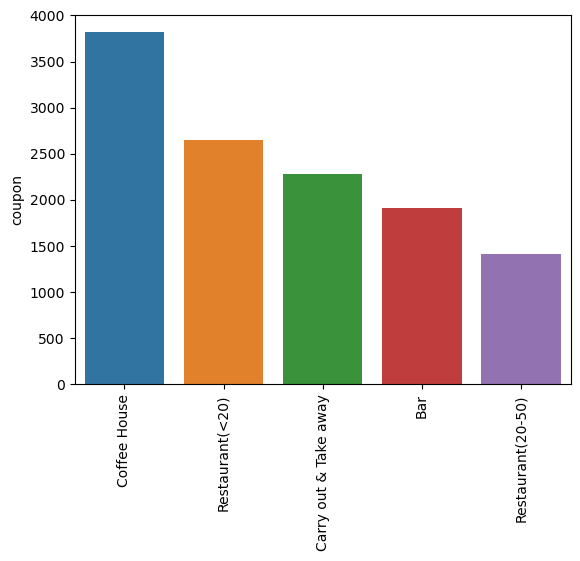

In [221]:
my_plot = sns.barplot(x=coupon_counts.index,y=coupon_counts)
#rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

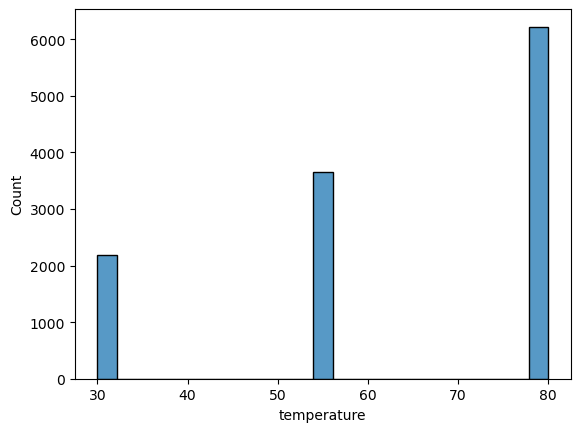

In [251]:
sns.histplot(data = mydf,x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [528]:
#df_barcoupon = mydf.groupby(['coupon','Y']).agg({'Bar':sum})
#df_barcoupon = mydf.groupby(['coupon','Y'])['Bar'].sum().sort_values(ascending=False)
df_barcoupon = mydf.groupby(['coupon'])[['Bar','Y']]
print(type(df_barcoupon))
print(df_barcoupon.sample())


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
       Bar  Y
12595    0  0
9928     1  1
5909     1  1
10211    1  1
9963     0  0


2. What proportion of bar coupons were accepted?


In [537]:
# Calculate bar coupons accepted and not accepted
barcoupon_accepted = mydf.query('Y ==1')[['Bar']].sum()
print(barcoupon_accepted)
barcoupon_unaccepted = mydf.query('Y ==0')[['Bar']].sum()
print(barcoupon_unaccepted)

Bar    10711
dtype: int64
Bar    6763
dtype: int64


In [538]:
# Calculate acceptance rate from the above coupons accpeted and not accepted
# Answer = 0.612968
ar_bar_accepted = barcoupon_accepted/(barcoupon_unaccepted+barcoupon_accepted)
print(ar_bar_accepted)

Bar    0.612968
dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [541]:
# Bar_below3 = find total rows with Bar values <= 2 and Y ==1
Bar_below3_accepted = mydf.query('Bar <= 2 and Y == 1')[['Bar']].sum()
print(Bar_below3_accepted)
Bar_below3_unaccepted = mydf.query('Bar <= 2 and Y == 0')[['Bar']].sum()
print(Bar_below3_unaccepted)
# Acceptance Rate for Bar below 3
ar_bar_below3 = Bar_below3_accepted/(Bar_below3_accepted + Bar_below3_unaccepted)
print(ar_bar_below3 )

Bar    4891
dtype: int64
Bar    3243
dtype: int64
Bar    0.601303
dtype: float64


In [584]:
# Bar_above3 = find total rows with Bar values >2 
Bar_above3_accepted = mydf.query('Bar > 2 and Y == 1')[['Bar']].sum()
print(Bar_above3_accepted)
Bar_above3_unaccepted = mydf.query('Bar >  2 and Y == 0')[['Bar']].sum()
print(Bar_above3_unaccepted)
# Acceptance Rate for Bar below 3
ar_bar_above3 = Bar_above3_accepted/(Bar_above3_accepted + Bar_above3_unaccepted)
print(ar_bar_above3 )

Bar    5820
dtype: int64
Bar    3520
dtype: int64
Bar    0.623126
dtype: float64


In [544]:
# Is  ar_bar_below3 > ar_bar_above3 ? 
#Answer: The acceptance rate from below 3 times is LESS than those from above 3 times. 
print(ar_bar_below3 < ar_bar_above3)

Bar    True
dtype: bool


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [257]:
#Create a new df to include age, bar, Y and the all others 
#finding unique value for age group
mydf['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [258]:
mydf['age'].replace(['21', '46', '26', '31', '41', '50plus', '36', 'below21'], [1,6,2,3,5,7,4,0], inplace=True)

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_81742/1025105371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['age'].replace(['21', '46', '26', '31', '41', '50plus', '36', 'below21'], [1,6,2,3,5,7,4,0], inplace=True)


In [586]:
#create acceptance rate (ar) for age_over25_bar_over1 
age_over25_bar_over1_accepted = mydf.query('age >= 2 and Bar > 2 and Y == 1')[['age']].sum()
print(age_over25_bar_over1_accepted)
age_over25_bar_over1_unaccepted = mydf.query('age >= 2 and Bar > 2 and Y == 0')[['age']].sum()
print(age_over25_bar_over1_unaccepted)

age    1882
dtype: int64
age    1279
dtype: int64


In [587]:
#calculate acceptance rate for age_over25_bar_over1
ar_over25_bar_over1_accepted = age_over25_bar_over1_accepted/(age_over25_bar_over1_accepted +age_over25_bar_over1_unaccepted)
print(ar_over25_bar_over1_accepted)

age    0.595381
dtype: float64


In [617]:
#create all other from age below 25 OR bar less than 1
bar_u1_accept = mydf.query('age < 2 and Bar < 2 and Y ==1')[['age']].sum()
print(bar_u1_accept)
bar_u1_unaccept = mydf.query('age < 2 and Bar < 2 and Y ==0')[['age']].sum()
print(bar_u1_unaccept)
list_nobar=['CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
other_accept = mydf.query('age < 2 and passanger in @list_nobar and Y==1')[['age']].sum()
print(other_accept)
other_unaccept = mydf.query('age < 2 and  passanger in @list_nobar and Y==0')[['age']].sum()
print(other_unaccept)

age    874
dtype: int64
age    651
dtype: int64
age    0.0
dtype: float64
age    0.0
dtype: float64


In [620]:
#Calcul;ate acceptance rate for df_allother 
ar_allother_accepted = (other_accept+bar_u1_accept)/(other_accept +other_unaccept+bar_u1_accept+bar_u1_unaccept)
print(ar_allother_accepted)

age    0.573115
dtype: float64


In [593]:
#is acceptance rate  from over25 and bar_over1  LESS than those from "all others"?
print( ar_over25_bar_over1_accepted < ar_allother_accepted)

age    False
dtype: bool


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [310]:
#Unique values of passenger 
mydf['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [309]:
#unique values of oocupation
mydf['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [599]:
#Acceptance rate for passenger going to bar more than once 
bar_over1_accepted = mydf.query('Bar >= 2 and Y ==1')[['Bar']].sum()
print(bar_over1_accepted)
bar_over1_unaccepted = mydf.query('Bar >= 2 and Y ==0')[['Bar']].sum()
print(bar_over1_unaccepted)
ar_bar_over1 = bar_over1_accepted/(bar_over1_accepted + bar_over1_unaccepted)
print(ar_bar_over1)

Bar    8782
dtype: int64
Bar    5298
dtype: int64
Bar    0.623722
dtype: float64


In [627]:
#Acceptance rate for passenger without kid 
list_nokid = ['Alone', 'Friend(s)', 'Partner']
nokid_accepted = mydf.query('passanger in @list_nokid and Y==1')[['Bar']].sum()
print(nokid_accepted)
nokid_unaccepted = mydf.query('passanger in @list_nokid and Y==0')[['Bar']].sum()
print(nokid_unaccepted)
ar_nokid_accepted = nokid_accepted/(nokid_accepted + nokid_unaccepted)
print(ar_nokid_accepted)

Bar    10232
dtype: int64
Bar    6402
dtype: int64
Bar    0.615126
dtype: float64


In [329]:
#Cut and Paste tofind the columns without Farming, Fishing or Fisheries... 
list_noFFF = ['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance']



In [628]:
# Calculate acceptance rate for those having occupations other than farming, fishing, or forestry
noFFF_accept = mydf.query('occupation in @list_noFFF and Y==1')[['Bar']].sum()
print(noFFF_accept)
noFFF_unaccept = mydf.query('occupation in @list_noFFF and Y==0')[['Bar']].sum()
print(noFFF_unaccept)
ar_noFFF_accept= noFFF_accept/(noFFF_accept + noFFF_unaccept)
print(ar_noFFF_accept)

Bar    10695
dtype: int64
Bar    6757
dtype: int64
Bar    0.612824
dtype: float64


In [629]:
#Compare the acceptance rate among "bar_over1", "nokid" and "noFFF" where FFF =Fish, Famring or Forestry.
print(ar_nokid_accepted,ar_noFFF_accept,ar_bar_over1)

Bar    0.615126
dtype: float64 Bar    0.612824
dtype: float64 Bar    0.623722
dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [635]:
# Calculate accpetance rate for "bars more than once a month, had passengers that were not a kid, and were not widowed"
mydf['maritalStatus'].unique()
list_nowidow = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']
barover1_nokid_nowidow_accept = mydf.query('Bar > 2 and maritalStatus in @list_nowidow and Y==1')[['Bar']].sum()
print(barover1_nokid_nowidow_accept)
barover1_nokid_nowidow_unaccept = mydf.query('Bar > 2 and maritalStatus in @list_nowidow and Y==0')[['Bar']].sum()
print(barover1_nokid_nowidow_unaccept)
ar_barover1_nokid_nowidow = barover1_nokid_nowidow_accept/(barover1_nokid_nowidow_accept +barover1_nokid_nowidow_unaccept)
print(ar_barover1_nokid_nowidow)

Bar    5820
dtype: int64
Bar    3520
dtype: int64
Bar    0.623126
dtype: float64


In [636]:
# Calculate accpetance rate for ""bars more than once a month and are under the age of 30
age_under30 = [0,1,2]
barover1_ageu30_accept = mydf.query('Bar > 2 and age in @age_under30 and Y==1')[['Bar']].sum()
print(barover1_ageu30_accept)
barover1_ageu30_unaccept = mydf.query('Bar > 2 and age in @age_under30 and Y==0')[['Bar']].sum()
print(barover1_ageu30_unaccept)
ar_barover1_ageu30 = barover1_ageu30_accept/(barover1_ageu30_accept +barover1_ageu30_unaccept)
print(ar_barover1_ageu30)

Bar    4034
dtype: int64
Bar    2166
dtype: int64
Bar    0.650645
dtype: float64


In [642]:
# Calculate accpetance rate for "cheap restaurants more than 4 times a month and income is less than 50K"
mydf['RestaurantLessThan20'].unique()
eato4 = ['4~8','gt8']

In [643]:
mydf['income'].unique()
under50k = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499','Less than $12500']

In [644]:
# Calculate accpetance rate for "go to cheap restaurants more than 4 times a month and income is less than 50K"

eatover4_icu50k_accept = mydf.query('RestaurantLessThan20 in @eato4 and income in @under50k and Y==1')[['Bar']].sum()
print(eatover4_icu50k_accept)
eatover4_icu50k_unaccept = mydf.query('RestaurantLessThan20 in @eato4 and income in @under50k and Y==0')[['Bar']].sum()
print(eatover4_icu50k_unaccept)
ar_eatover4_icu50k = eatover4_icu50k_accept/(eatover4_icu50k_accept + eatover4_icu50k_unaccept)
print(ar_eatover4_icu50k)

Bar    2831
dtype: int64
Bar    1412
dtype: int64
Bar    0.667217
dtype: float64


In [646]:
print(ar_barover1_nokid_nowidow,ar_barover1_ageu30,ar_eatover4_icu50k)

Bar    0.623126
dtype: float64 Bar    0.650645
dtype: float64 Bar    0.667217
dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [645]:
# From cell 646, 'ar_eatover4_icu50k is the larest... 
# Answer : Drivers who "go to cheap restaurants more than 4 times a month and income is less than 50K" is likely to accept a coupon.

Bar    0.623126
dtype: float64 Bar    0.650645
dtype: float64 Bar    0.667217
dtype: float64


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  